In [4]:
import numpy as np # для работы с массивами
import pandas as pd # для работы DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

In [5]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

del df['Serial No.']
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


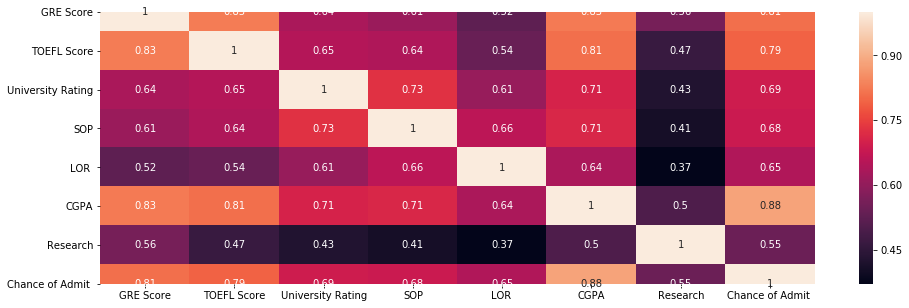

In [13]:
C = df.corr()
plt.figure(figsize=(16,5)) # размер графика
sns.heatmap(data=C, annot=True)

In [14]:
C


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


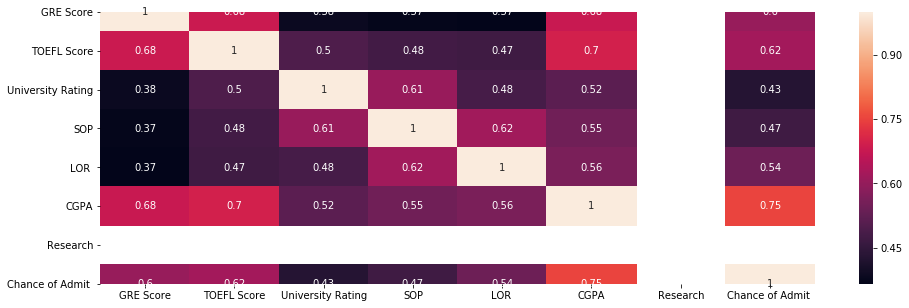

In [31]:
data_2 = df[df['Research'] == 0]
C_2 = data_2.corr()
plt.figure(figsize=(16,5)) # размер графика
sns.heatmap(data=C_2, annot=True)

In [32]:
C_2

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.680668,0.384715,0.371424,0.365864,0.678476,NaN,0.603827
TOEFL Score,0.680668,1.000000,0.495748,0.476563,0.470956,0.696774,NaN,0.622458
University Rating,0.384715,0.495748,1.000000,0.607496,0.484262,0.516427,NaN,0.428580
SOP,0.371424,0.476563,0.607496,1.000000,0.618680,0.547098,NaN,0.470188
LOR,0.365864,0.470956,0.484262,0.618680,1.000000,0.562517,NaN,0.542528
CGPA,0.678476,0.696774,0.516427,0.547098,0.562517,1.000000,NaN,0.752714
Research,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chance of Admit,0.603827,0.622458,0.428580,0.470188,0.542528,0.752714,NaN,1.000000


In [34]:
Data = data_2[['TOEFL Score','CGPA']]
Data

,TOEFL Score,CGPA
4,103,8.21
7,101,7.90
8,102,8.00
9,108,8.60
15,105,8.30
...,...,...
487,115,9.14
489,110,8.50
491,99,7.81
498,103,8.43


In [39]:
y=data_2[['Chance of Admit ']] # объект типа dataframe - то, что нужно
y

,Chance of Admit
4,0.65
7,0.68
8,0.50
9,0.45
15,0.54
...,...
487,0.79
489,0.65
491,0.54
498,0.73


In [55]:
A = np.column_stack((np.ones(220), Data['TOEFL Score'], Data['CGPA']))
w_hat = np.linalg.lstsq(A,y,rcond=None)[0]
w_hat

array([[-1.04486443],
       [ 0.00442727],
       [ 0.14807744]])

In [54]:
new = np.array([1, 107, 9.1])

new@w_hat

array([0.77635853])

In [56]:
# метод .mean() позволяет вычислить арифметическое среднее значение вектора
meanTOEFL = Data['TOEFL Score'].mean()
meanCGPA  = Data['CGPA'].mean()
mean_y = y.mean()
print('mean value of CRIME:', meanTOEFL)
print('mean value of RM:', meanCGPA)
print('mean value of PRICE:', mean_y)

mean value of CRIME: 103.99090909090908
mean value of RM: 8.234727272727275
mean value of PRICE: Chance of Admit     0.634909
dtype: float64


In [57]:
TOEFL_c = Data['TOEFL Score'] - meanTOEFL
CGPA_c = Data['CGPA'] - meanCGPA
y_c = y - mean_y
print('CRIME до центрирования:\n', TOEFL_c.head(4))
print('CRIME после центрирования:\n', CGPA_c.head(4))

CRIME до центрирования:
 4   -0.990909
7   -2.990909
8   -1.990909
9    4.009091
Name: TOEFL Score, dtype: float64
CRIME после центрирования:
 4   -0.024727
7   -0.334727
8   -0.234727
9    0.365273
Name: CGPA, dtype: float64


In [58]:
TOEFL_c_norm = np.linalg.norm(TOEFL_c)
CGPA_c_norm = np.linalg.norm(CGPA_c)
y_c_norm = np.linalg.norm(y_c)

In [59]:
TOEFL_st=TOEFL_c / TOEFL_c_norm
CGPA_st=CGPA_c / CGPA_c_norm
y_st=y_c / y_c_norm


In [62]:
A_st=np.column_stack(( TOEFL_st, CGPA_st,))
w_hat = np.linalg.lstsq(A_st,y,rcond=None)[0]
w_hat

array([[0.31542519],
       [1.02688779]])

In [63]:
new = np.array([107, 9.1])
new@w_hat


array([43.09517373])